<a href="https://colab.research.google.com/github/kvikik/MMO/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

##Первичный анализ данных



##Определение типов переменных.
Для второй работы была взята другая базза данных.

###**Номинальные переменные:**

Gender (пол)

Occupation (профессия)

Sleep Disorder (расстройство сна)

BMI Category (категория ИМТ)

###**Порядковые переменные:**

Person ID (идентификатор)

###**Числовые переменные:**

Age (возраст)

Sleep Duration (длительность сна)

Physical Activity Level (уровень физической активности)

Heart Rate (пульс)

Daily Steps (ежедневные шаги)

Blood Pressure (давление) — выглядит как числовое, но по содержанию может быть расценено как групповая метка, если представить строкой (пониженное, нормальное, повышенное давление)

Quality of Sleep (качество сна)

Stress Level (уровень стресса)


“Quality of Sleep” используется как целевая переменная потому, что:

Это интегральный показатель состояния человека (итог здорового сна), который хочет объяснить и предсказать большинство исследований по теме “здоровье и образ жизни”.

Это числовая переменная, ее удобно анализировать с помощью регрессии: она отражает уровень качества сна, где большие значения — хороший сон, маленькие — плохой.

Остальные параметры в датасете — либо объясняющие (возраст, профессия, физ.активность и т.д.), либо номинальные характеристики, влияющие на качество сна, но не являющиеся его результатом.

In [1]:
!pip install pandas seaborn scikit-learn

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [12]:
categorical = ["cash_type", "coffee_name"]
ordinal = ["Weekday", "Month_name", "Time_of_Day", "Date", "Time", "hour_of_day", "Weekdaysort", "Monthsort"]
numeric = ["money"]

In [13]:
df = pd.read_csv("/content/sample_data/Sleep_health_and_lifestyle_dataset.csv")

In [14]:
# Удаление лишних столбцов и дубликатов
df = df.drop(columns=['Person ID'])
df = df.drop_duplicates().reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   132 non-null    object 
 1   Age                      132 non-null    int64  
 2   Occupation               132 non-null    object 
 3   Sleep Duration           132 non-null    float64
 4   Quality of Sleep         132 non-null    int64  
 5   Physical Activity Level  132 non-null    int64  
 6   Stress Level             132 non-null    int64  
 7   BMI Category             132 non-null    object 
 8   Blood Pressure           132 non-null    object 
 9   Heart Rate               132 non-null    int64  
 10  Daily Steps              132 non-null    int64  
 11  Sleep Disorder           59 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 12.5+ KB


В переменной Sleep Disorder есть пропуски, предпологаемо, потому что у части пациентов просто нет расстройства сна.

Пропуски заменяем на "None" (не выявлено расстройство сна) — так корректнее для модели, чем заполнять "модой" или удалять строки.

In [16]:
# Категориальные признаки
cat_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')  # Заполняем пропуски

In [17]:
X_cat = pd.get_dummies(df[cat_cols], drop_first=True)      # OneHot-кодировка

In [18]:
# Числовые признаки
num_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Stress Level']
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

In [19]:
# Итоговая таблица признаков X и целевая y
X = pd.concat([X_num, X_cat], axis=1)
y = df['Quality of Sleep']

In [21]:
print('Размерность X:', X.shape)
print('Размерность y:', y.shape)

Размерность X: (132, 22)
Размерность y: (132,)


## Моделирование

In [27]:
# линейная регрессия на всех признаках, всей выборке
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)

mae = mean_absolute_error(y, preds)
mse = mean_squared_error(y, preds)
rmse = mse ** 0.5
r2 = r2_score(y, preds)

coeffs = pd.Series(model.coef_, index=X.columns)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)
print('\nКоэффициенты признаков (важность):')
display(coeffs)

MAE: 0.21379448092207387
MSE: 0.08849759309671801
RMSE: 0.2974854502269279
R2: 0.9446286246007894

Коэффициенты признаков (важность):


,0
Age,0.444128
Sleep Duration,0.175426
Physical Activity Level,0.014731
Heart Rate,-0.120383
Daily Steps,0.083956
Stress Level,-0.707826
Gender_Male,0.400902
Occupation_Doctor,-0.546468
Occupation_Engineer,-0.682548
Occupation_Lawyer,-0.436232


mae — средняя ошибка, ближе к реальным значениям (интерпретируемая в единицах “качество сна”).

mse, rmse — показывают типичное квадратичное отклонение.

r2 — доля объяснённой дисперсии (чем ближе к 1 — тем лучше объясняется качество сна).

coeffs — вклад каждого признака (чем больше модуль — тем сильнее влияние, знак — направление).

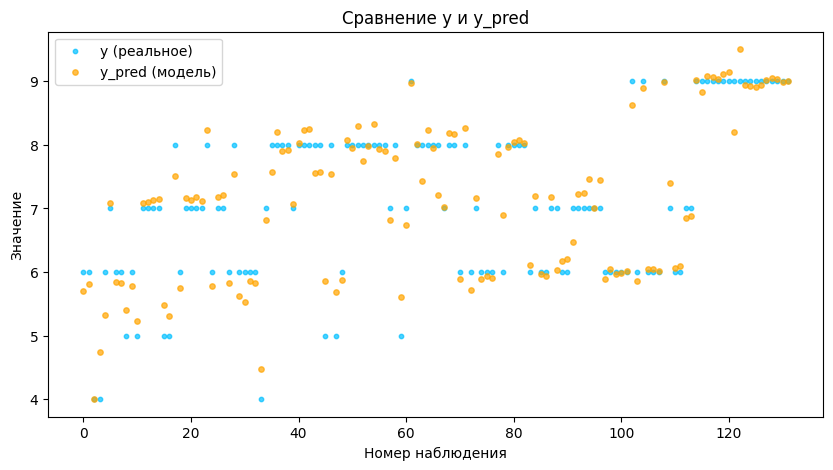

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(y)), y, s=10, color='deepskyblue', label='y (реальное)', alpha=0.7)
plt.scatter(range(len(y)), preds, s=15, color='orange', label='y_pred (модель)', alpha=0.7)
plt.title('Сравнение y и y_pred')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.show()


Добавим для каждого наблюдения вертикальную линию, соединяющую реальное и предсказанное значение. Так визуально лечге посмотреть точность — чем короче линия, тем меньше ошибка.

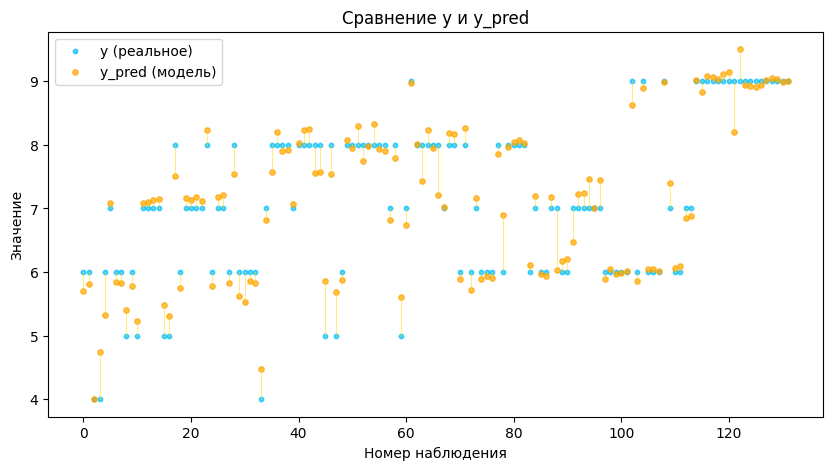

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(y)), y, s=10, color='deepskyblue', label='y (реальное)', alpha=0.7)
plt.scatter(range(len(y)), preds, s=15, color='orange', label='y_pred (модель)', alpha=0.7)

# Добавляем соединяющие линии между каждой парой реальное-прогноз
for i in range(len(y)):
    plt.plot([i, i], [y.iloc[i], preds[i]], color='gold', alpha=0.5, linewidth=0.7)

plt.title('Сравнение y и y_pred')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.show()

## Разделение на тестовую и обучающую

In [37]:
# Разделяем данные: 70% — обучение, 30% — тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели на training
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания: test
y_pred = model.predict(X_test)

# Метрики для тестовой выборки
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print('MAE (test):', mae)
print('MSE (test):', mse)
print('RMSE (test):', rmse)
print('R2 (test):', r2)

MAE (test): 0.24020505056377656
MSE (test): 0.11470859402665687
RMSE (test): 0.3386865719609457
R2 (test): 0.9232397530561894


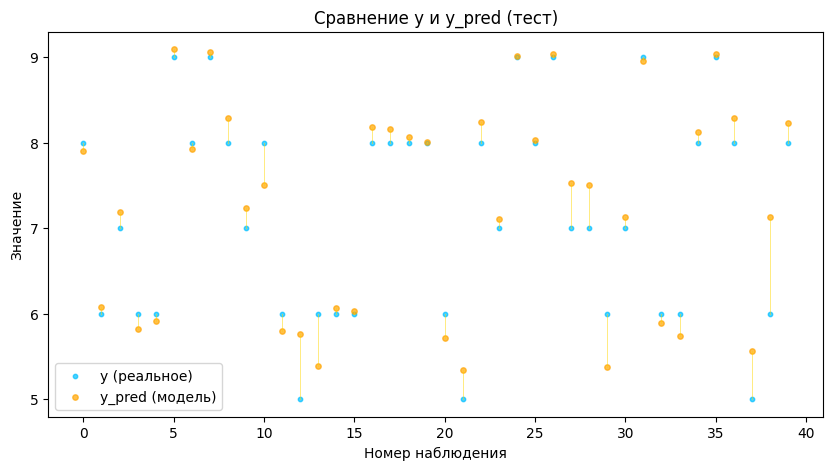

In [38]:
# Визуализация: сравнение реальных и прогнозных для тестовой выборки + линии
plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_test, s=10, color='deepskyblue', label='y (реальное)', alpha=0.7)
plt.scatter(range(len(y_test)), y_pred, s=15, color='orange', label='y_pred (модель)', alpha=0.7)

for i in range(len(y_test)):
    plt.plot([i, i], [y_test.iloc[i], y_pred[i]], color='gold', alpha=0.5, linewidth=0.7)

plt.title('Сравнение y и y_pred (тест)')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.legend()
plt.show()

Большинство прогнознируемых значений модели совпадает с реальными довольно хорошо — точки расположены близко друг к другу, а соединительные линии короткие. Однако для части наблюдений встречаются заметные расхождения, что отражается в более длинных линиях.
В целом, модель способна объяснять и предсказывать тенденции “качества сна” на основе признаков, но отдельные индивидуальные различия могут остаться неучтёнными.
Коэффициент детерминации  стремится к 1 ,что гооврить, что модель работает хорошо.